# Heart Failure Prediction

### Context

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

### Attribute Information 

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

## Data Analysis

### Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
df = pd.read_csv('heart.csv')

# read initial data from dataframe
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# last five records in dataframe
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


### Exploratory Data Analysis (EDA)

In [4]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# columns in dataframe
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
# stats behind dataset
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
# stats behind dataset including object datatype
df.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [8]:
# identifing unique values in every columns
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [9]:
# checking null values
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
# correlation between features
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [11]:
# make a groupby object for ChestPainType column
by_cpt = df.groupby('ChestPainType')

# mean of every chest pain
by_cpt.mean()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
ChestPainType,,,,,,,
ASY,54.959677,133.229839,186.645161,0.284274,128.477823,1.162702,0.790323
ATA,49.242775,130.624277,233.046243,0.109827,150.208092,0.307514,0.138728
NAP,53.310345,130.960591,197.438424,0.201970,143.236453,0.674877,0.354680
TA,54.826087,136.413043,207.065217,0.282609,147.891304,1.036957,0.434783


In [12]:
# groupby of 'RestingECG' column
by_recg = df.groupby('RestingECG')

# mean of every resting ecg type
by_recg.mean()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
RestingECG,,,,,,,
LVH,56.218085,134.335106,236.946809,0.223404,143.117021,1.069681,0.563830
Normal,51.740942,130.635870,195.375000,0.201087,137.302536,0.786051,0.516304
ST,56.140449,135.808989,169.129213,0.342697,128.617978,1.008989,0.657303


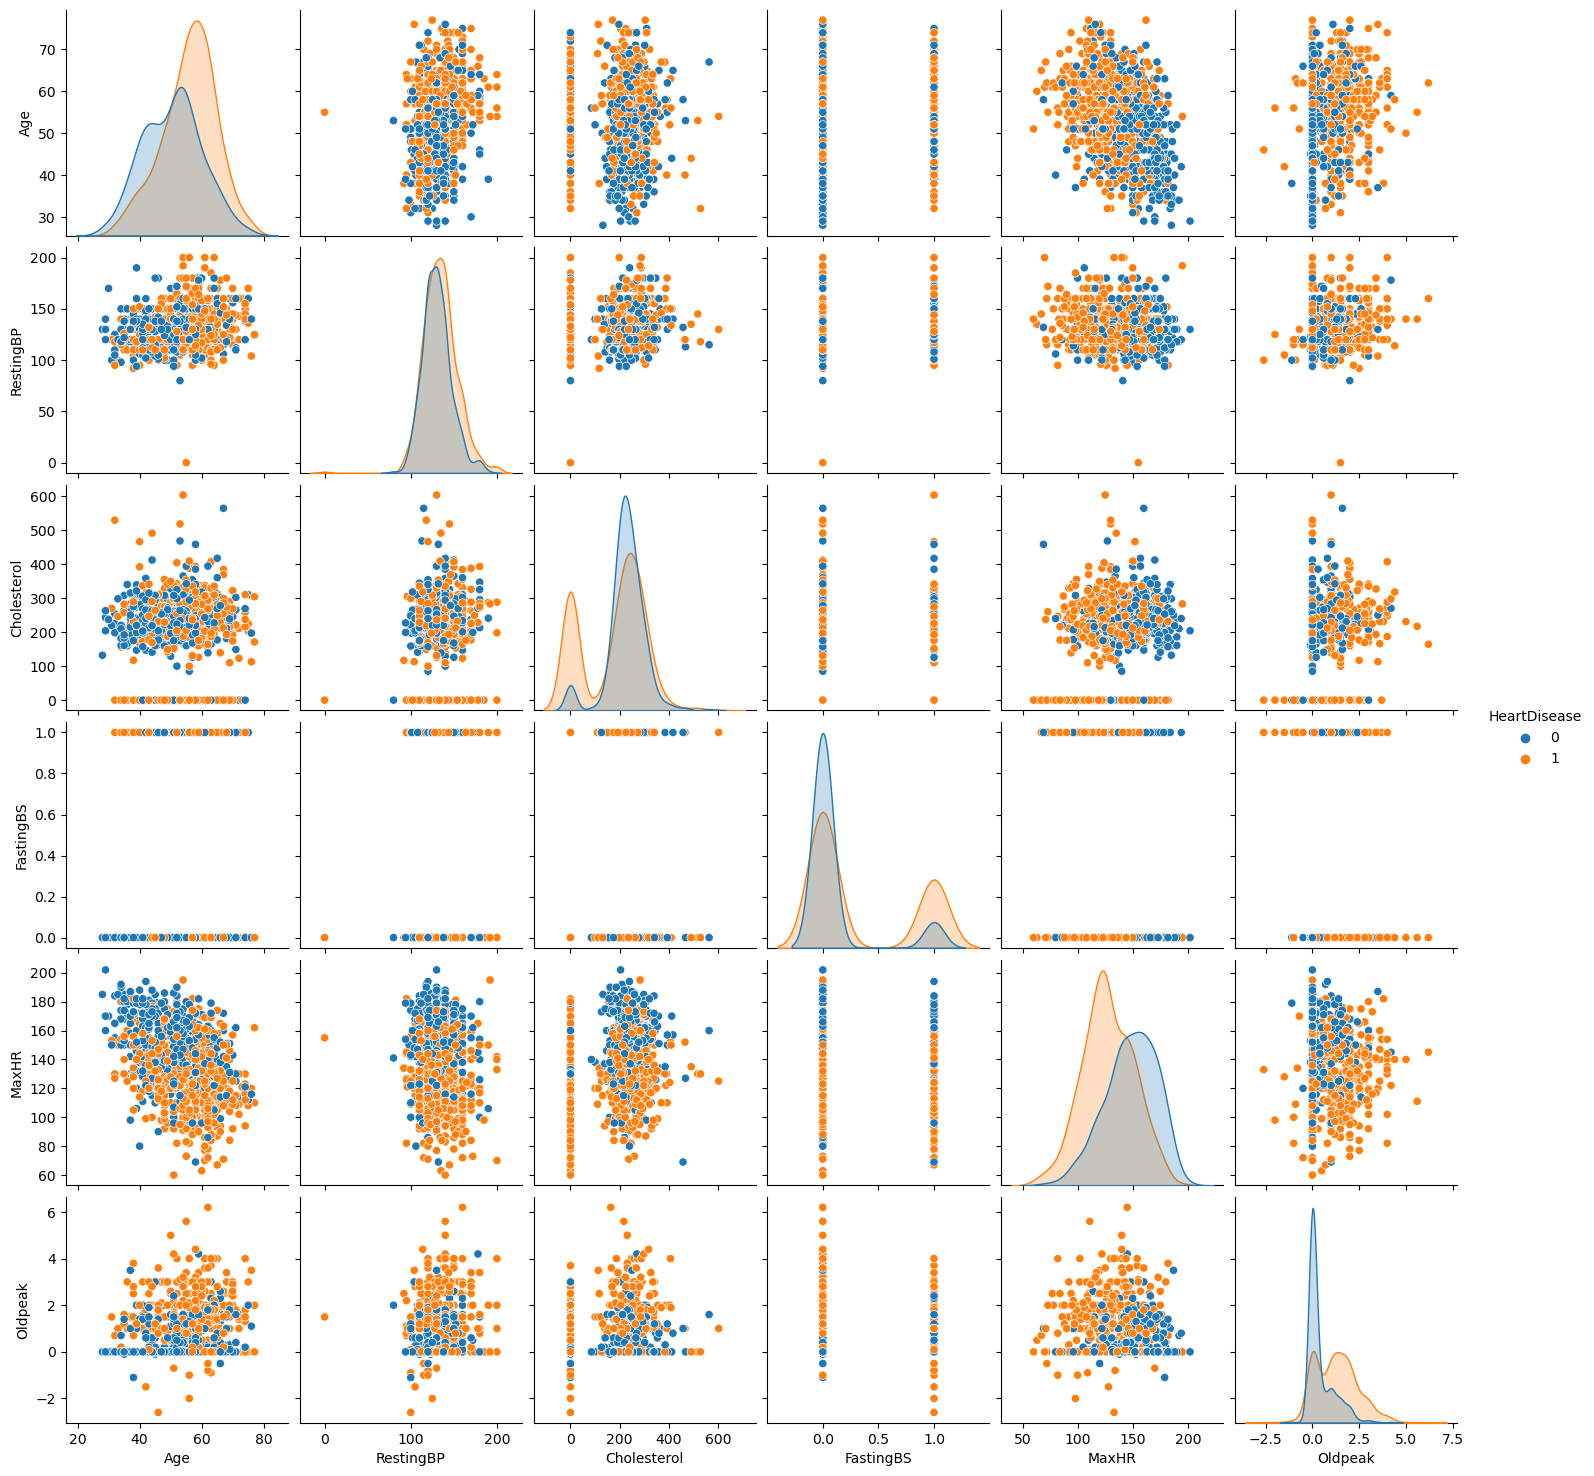

In [13]:
# make a pairplot for complete dataframe
sns.pairplot(df,hue='HeartDisease')

### Univariate Analysis

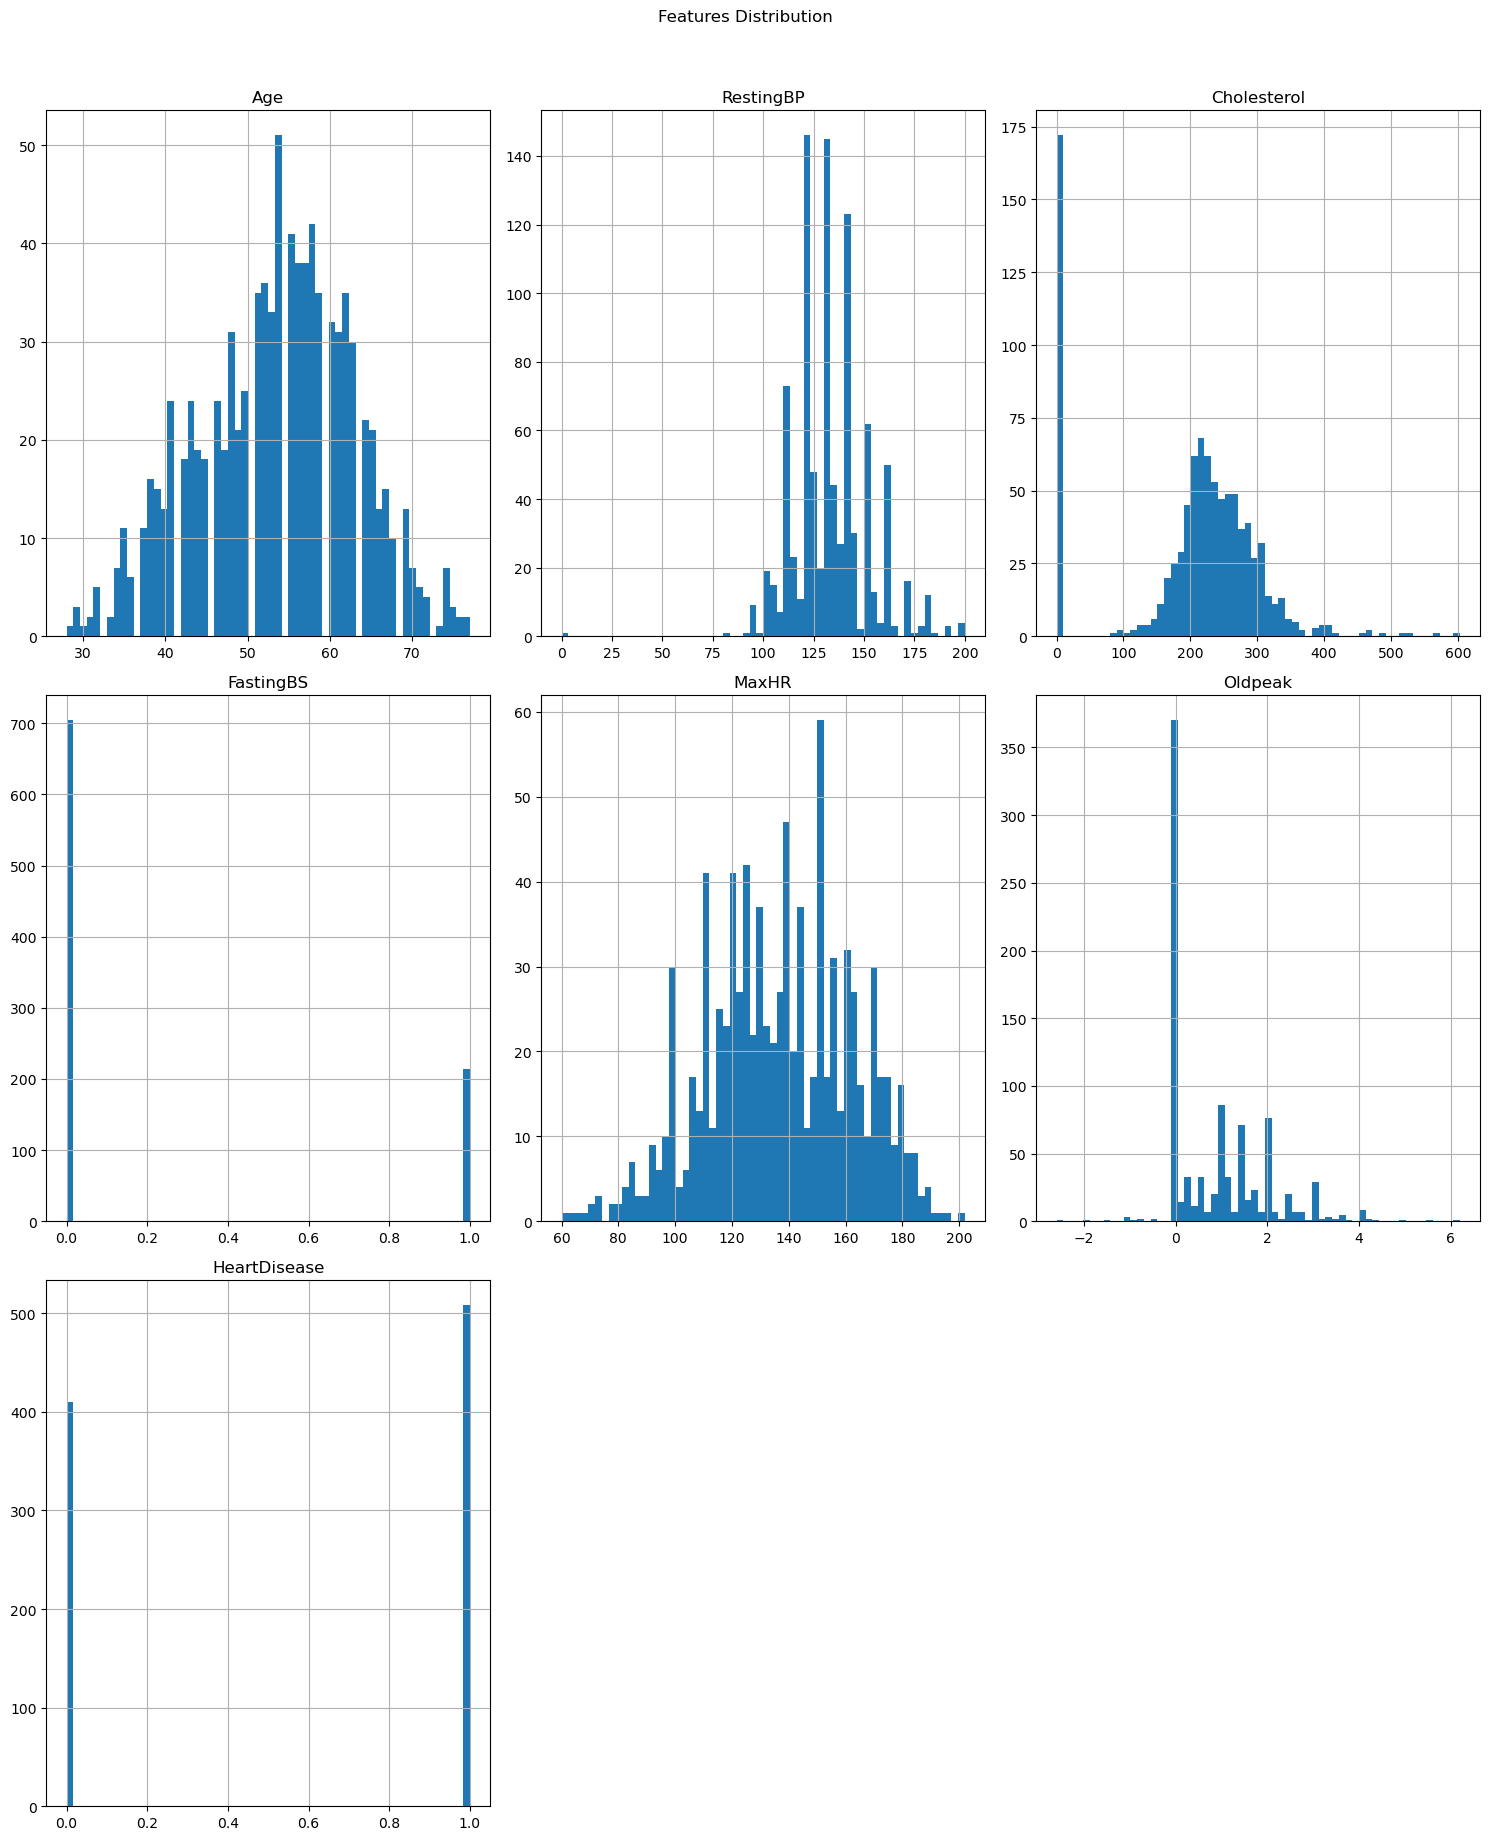

In [14]:
# making a features distribution histogram plot
df.hist(figsize=(15,18),bins=60)

# adding title
plt.suptitle('Features Distribution',x=0.5,y=1.02,ha='center',fontsize='large')

# adjust the plots gaps
plt.tight_layout()

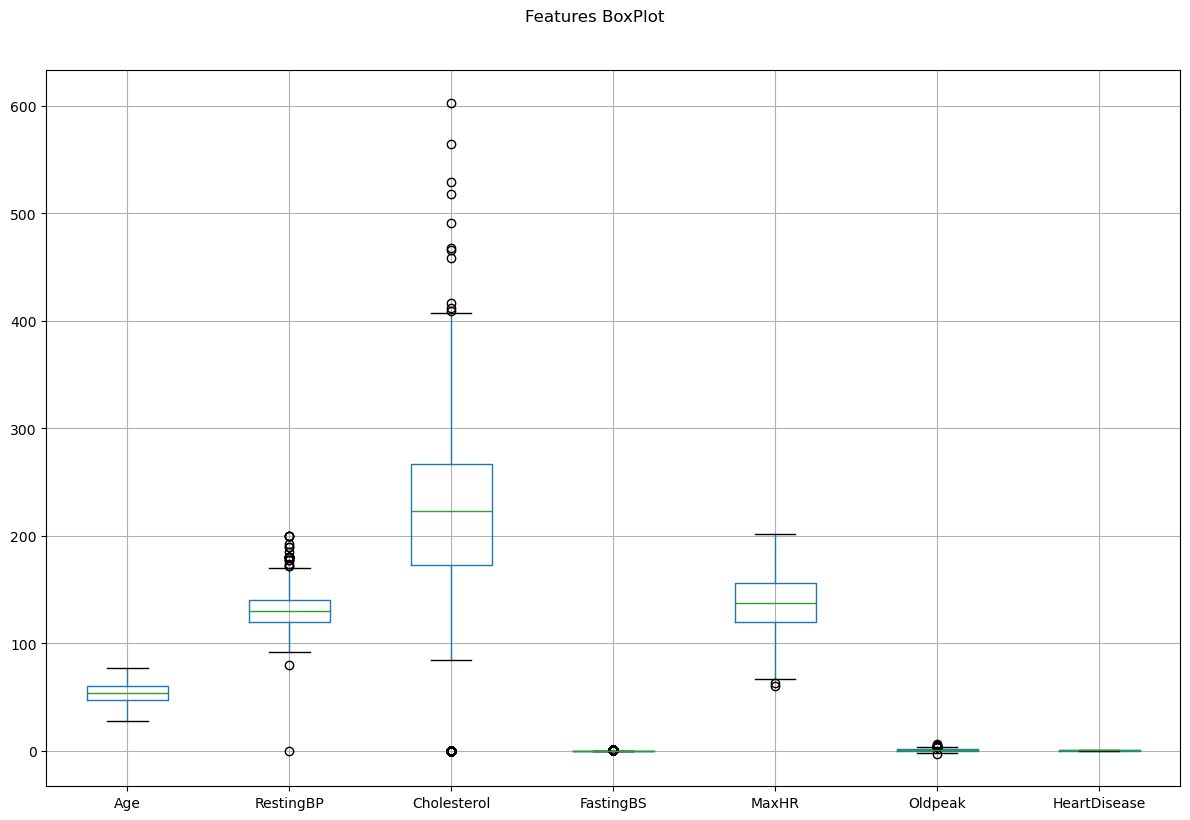

In [15]:
# making boxplot for all features
df.boxplot(figsize=(12,8))

# adding title
plt.suptitle('Features BoxPlot',x=0.5,y=1.02,ha='center',fontsize='large')

# adjust the plots gaps
plt.tight_layout()

([<matplotlib.patches.Wedge at 0x235059cfe50>,
 [Text(-0.8686626780128878, 0.6748519480800795, 'Male'),
  Text(0.8686626780128874, -0.67485194808008, 'Female')],
 [Text(-0.47381600618884784, 0.3681010625891342, '79%'),
  Text(0.4738160061888476, -0.3681010625891345, '21%')])

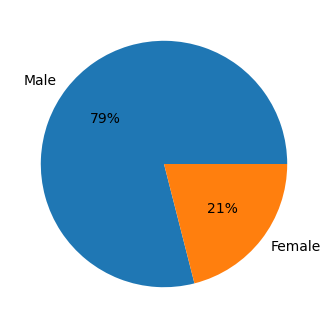

In [16]:
# list for the sex column
gender = ['Male','Female']

# make an object which store value count of the elements in sex column
gender_data = pd.Series(df['Sex']).value_counts()

# adjust size of the pie chart
plt.figure(figsize=(4,4))

# ploting pie chart
plt.pie(gender_data,labels=gender,autopct='%.0f%%')

([<matplotlib.patches.Wedge at 0x23505a1f370>,
 [Text(-0.13891224983042616, 1.0911935606697143, 'ASY: Asymptomatic'),
  Text(-0.641681260491555, -0.8934456670296014, 'NAP: Non-Anginal Pain'),
  Text(0.677820807686612, -0.8663480551528173, 'ATA: Atypical Angina'),
  Text(1.0863982306333049, -0.1724496578043122, 'TA: Typical Angina')],
 [Text(-0.07577031808932334, 0.5951964876380259, '54%'),
  Text(-0.35000796026812087, -0.48733400019796436, '22%'),
  Text(0.3697204405563338, -0.4725534846288094, '19%'),
  Text(0.5925808530727117, -0.09406344971144302, '5%')])

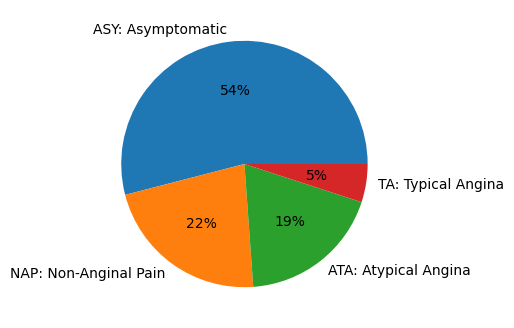

In [17]:
# list for the chest pain type column
chest_pain = ['ASY: Asymptomatic', 'NAP: Non-Anginal Pain', 'ATA: Atypical Angina', 
              'TA: Typical Angina']

# make an object which store value count of the elements in chest pain type column
cp_data = pd.Series(df['ChestPainType']).value_counts()

# adjust size of the pie chart
plt.figure(figsize=(4,4))

# ploting pie chart
plt.pie(cp_data,labels=chest_pain,autopct='%.0f%%')

([<matplotlib.patches.Wedge at 0x23505a6e8b0>,
 [Text(-0.34421212269343693, 1.0447573950879114, 'Normal'),
  Text(-0.31548342260471296, -1.0537885034776269, 'LVH'),
  Text(0.9021455870071273, -0.6293912454456019, 'ST')],
 [Text(-0.18775206692369284, 0.5698676700479517, '60%'),
  Text(-0.17208186687529795, -0.5747937291696146, '20%'),
  Text(0.4920794110947967, -0.34330431569760095, '19%')])

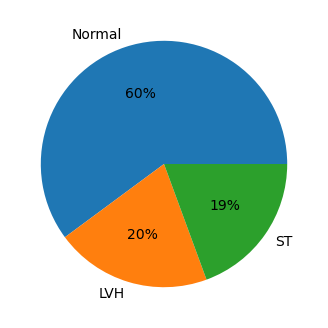

In [18]:
# list for the resting ecg column
rest_ecg = ['Normal','LVH','ST']

# make an object which store value count of the elements in chest pain type column
recg_data = pd.Series(df['RestingECG']).value_counts()

# adjust size of the pie chart
plt.figure(figsize=(4,4))

# ploting pie chart
plt.pie(recg_data,labels=rest_ecg,autopct='%.0f%%') 

<AxesSubplot:xlabel='Sex', ylabel='count'>

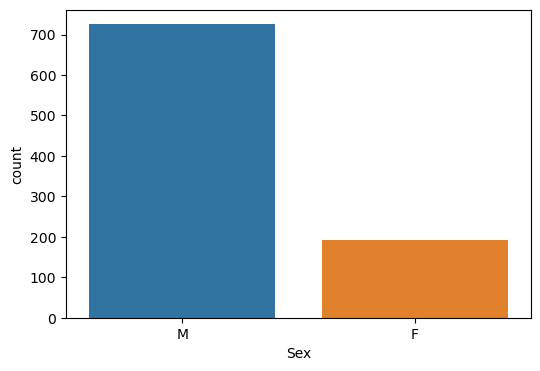

In [19]:
# count plot for sex column
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Sex')

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

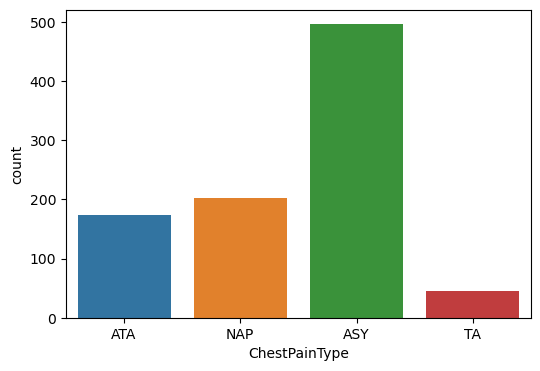

In [20]:
# count plot for chest pain type column
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='ChestPainType')

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

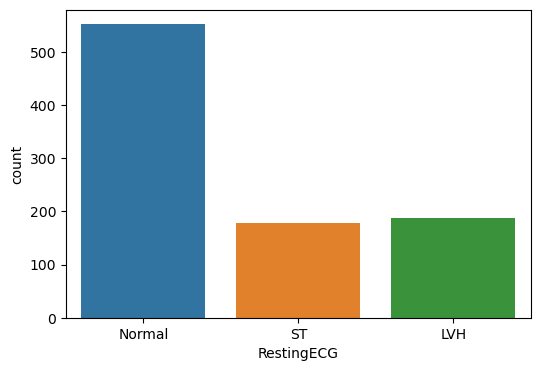

In [21]:
# count plot for resting ecg column
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='RestingECG')

<AxesSubplot:xlabel='ExerciseAngina', ylabel='count'>

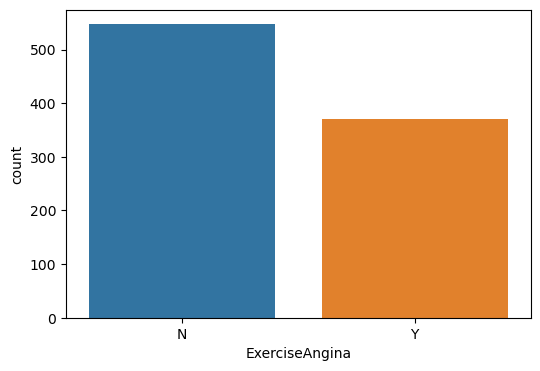

In [22]:
# count plot for excercise angina column
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='ExerciseAngina')

<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

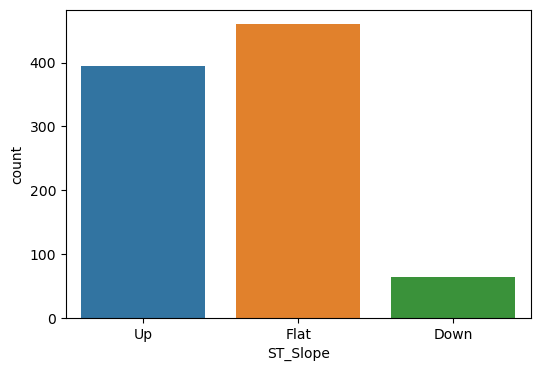

In [23]:
# count plot for st slope column
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='ST_Slope')

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

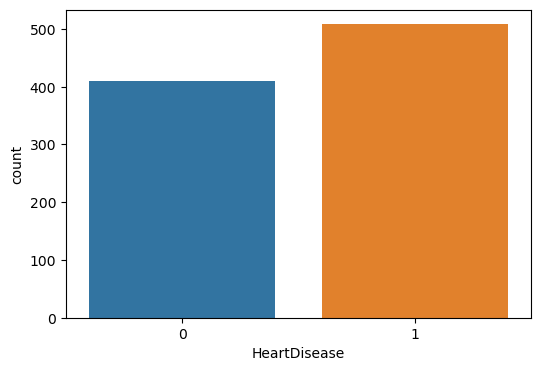

In [24]:
# count plot for heart disease column
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='HeartDisease')

In [25]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

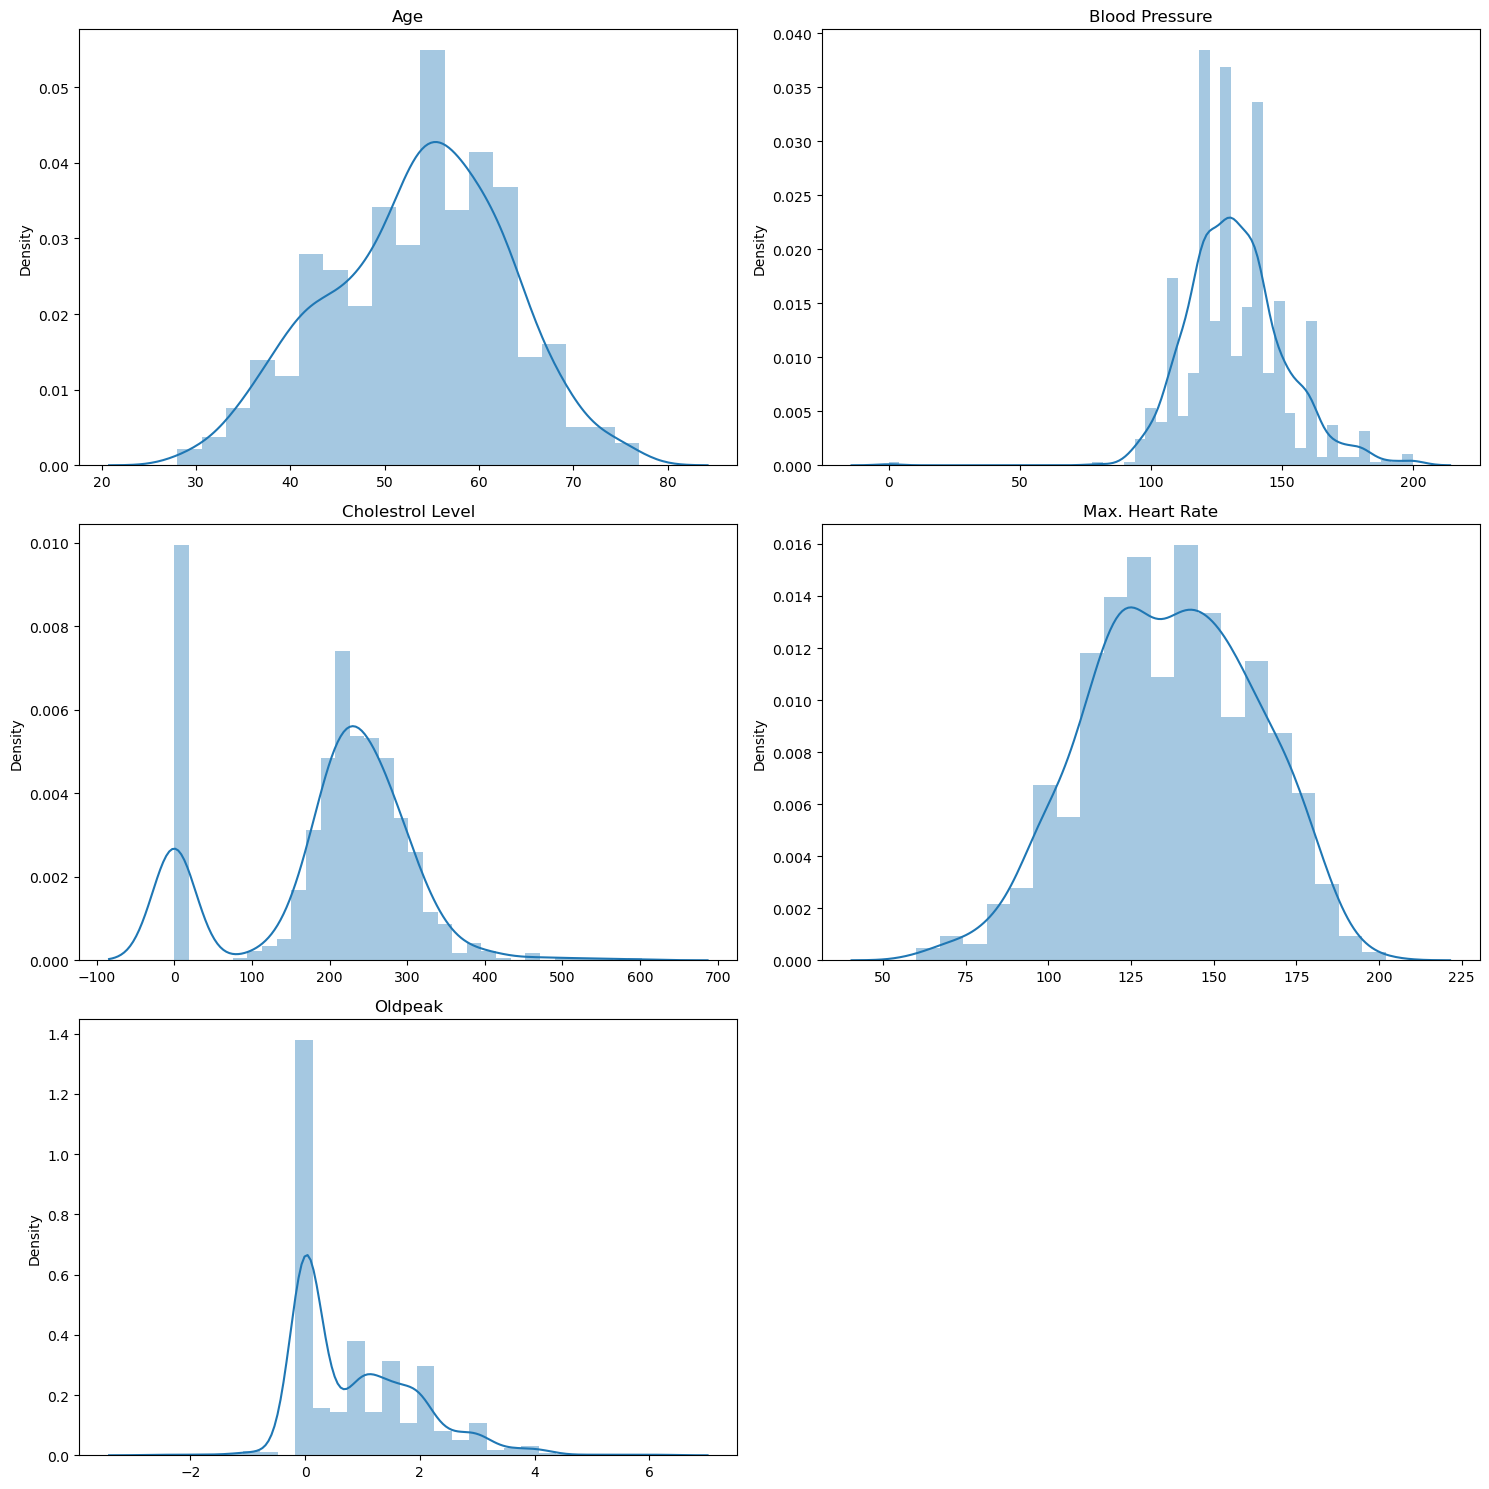

In [26]:
# making histogram with kde to see the distribution of features
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.distplot(x=df['Age'],kde=True)
plt.title('Age')

plt.subplot(3,2,2)
sns.distplot(x=df['RestingBP'],kde=True)
plt.title('Blood Pressure')

plt.subplot(3,2,3)
sns.distplot(x=df['Cholesterol'],kde=True)
plt.title('Cholestrol Level')

plt.subplot(3,2,4)
sns.distplot(x=df['MaxHR'],kde=True)
plt.title('Max. Heart Rate')

plt.subplot(3,2,5)
sns.distplot(x=df['Oldpeak'],kde=True)
plt.title('Oldpeak')

plt.tight_layout()

### Bivariate Analysis 

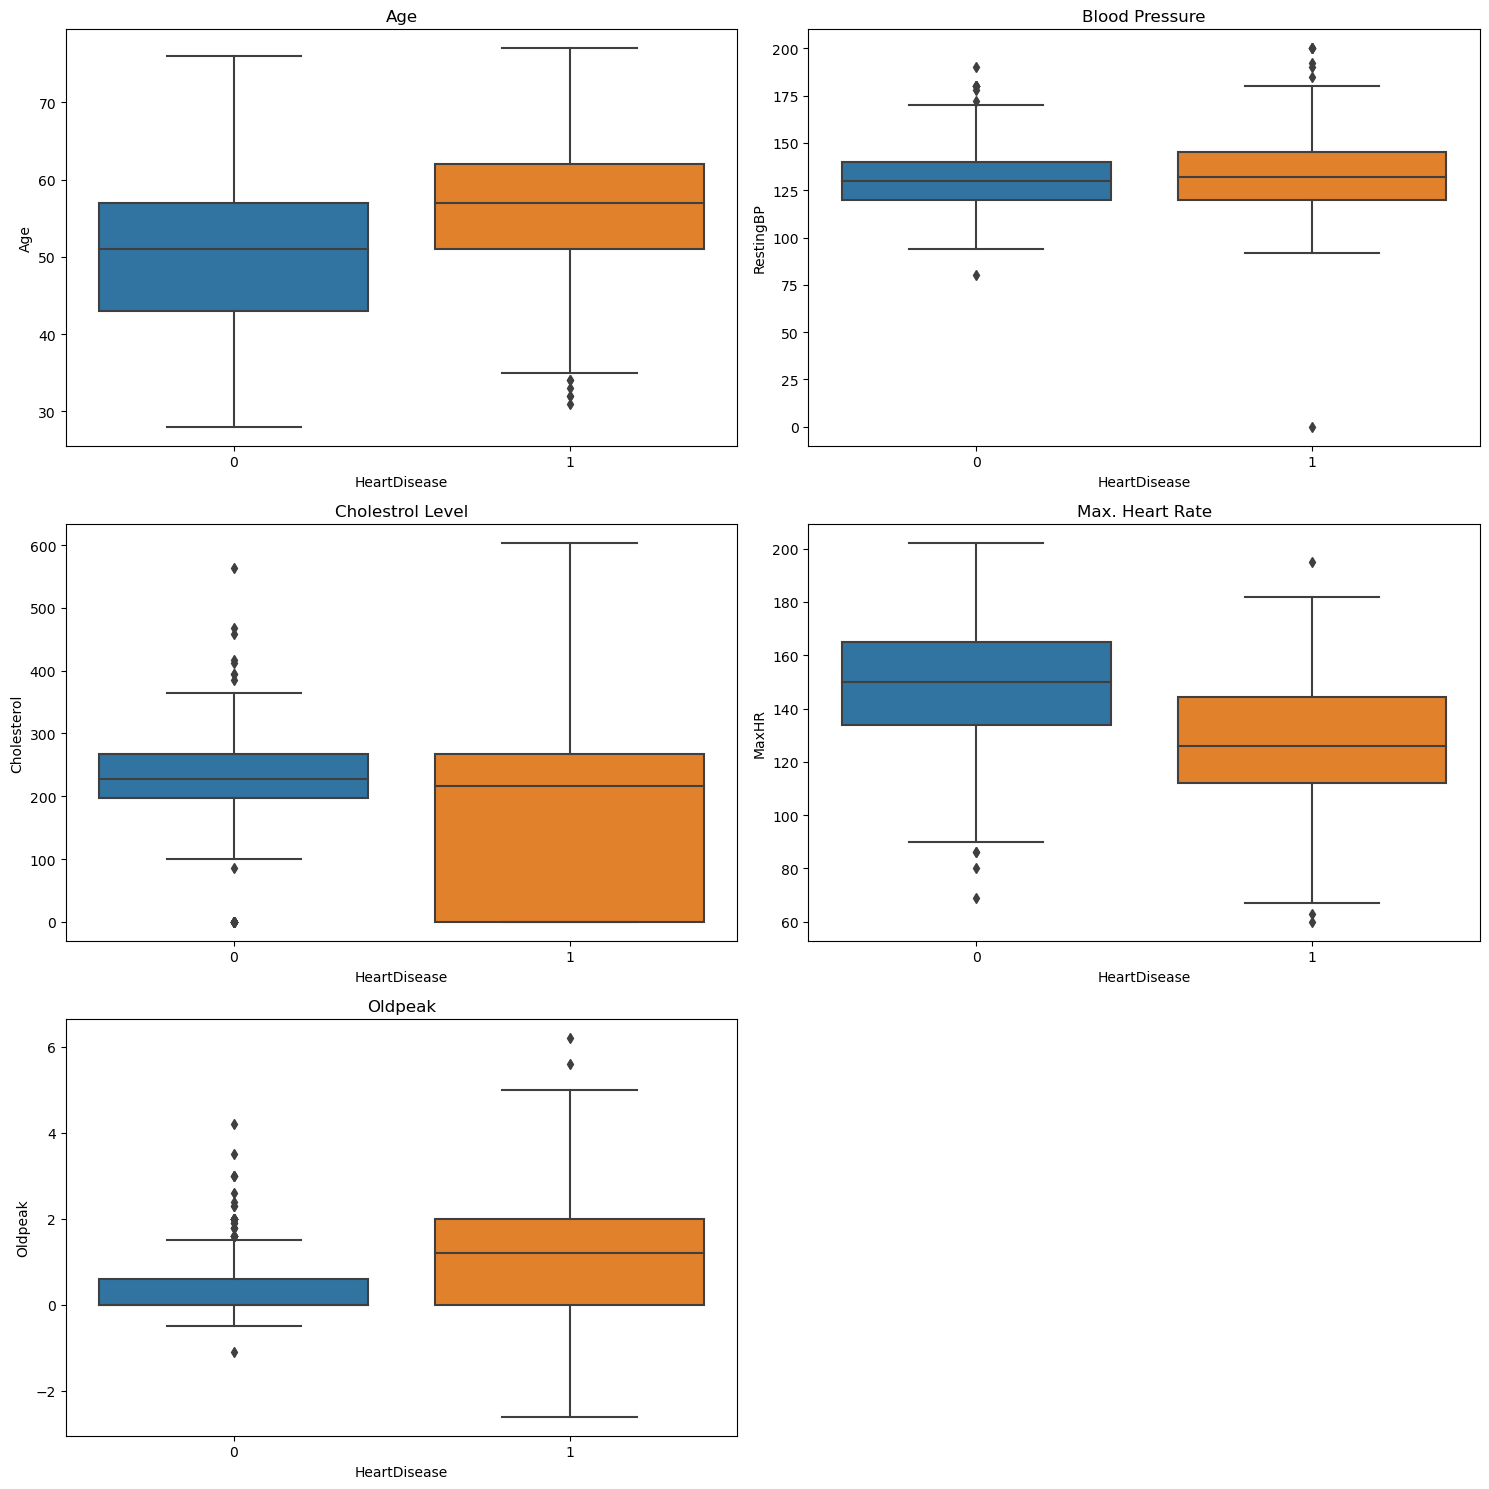

In [27]:
# making boxplots to see the distribution 
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.boxplot(x=df['HeartDisease'],y=df['Age'])
plt.title('Age')

plt.subplot(3,2,2)
sns.boxplot(x=df['HeartDisease'],y=df['RestingBP'])
plt.title('Blood Pressure')

plt.subplot(3,2,3)
sns.boxplot(x=df['HeartDisease'],y=df['Cholesterol'])
plt.title('Cholestrol Level')

plt.subplot(3,2,4)
sns.boxplot(x=df['HeartDisease'],y=df['MaxHR'])
plt.title('Max. Heart Rate')

plt.subplot(3,2,5)
sns.boxplot(x=df['HeartDisease'],y=df['Oldpeak'])
plt.title('Oldpeak')

plt.tight_layout()

<Figure size 1000x800 with 0 Axes>

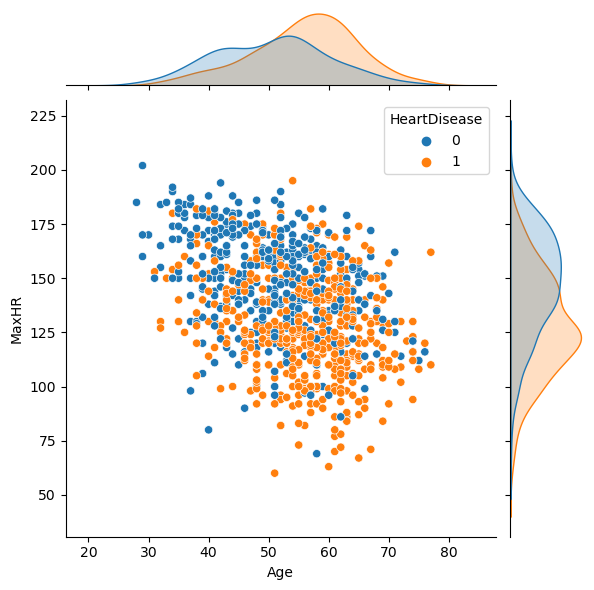

In [28]:
# jointplot for 'Age' vs 'Max. Heart Rate'
plt.figure(figsize=(10,8))
sns.jointplot(data=df,x='Age',y='MaxHR',hue='HeartDisease')

<Figure size 1000x800 with 0 Axes>

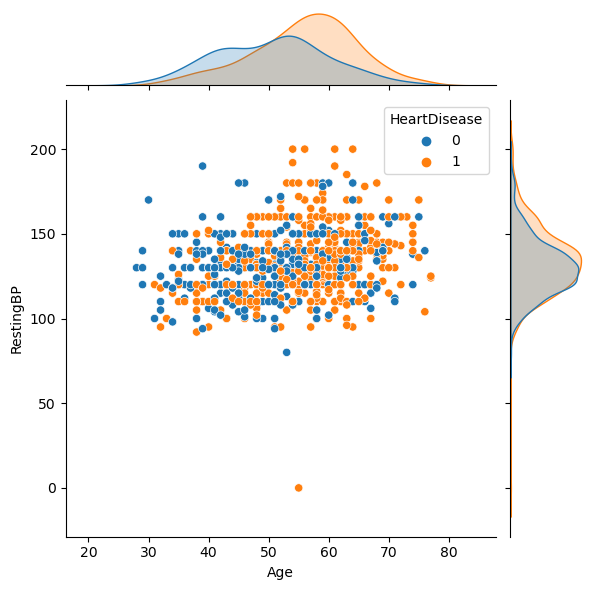

In [29]:
# jointplot for 'Age' vs 'Blood Pressure'
plt.figure(figsize=(10,8))
sns.jointplot(data=df,x='Age',y='RestingBP',hue='HeartDisease')

<Figure size 1000x800 with 0 Axes>

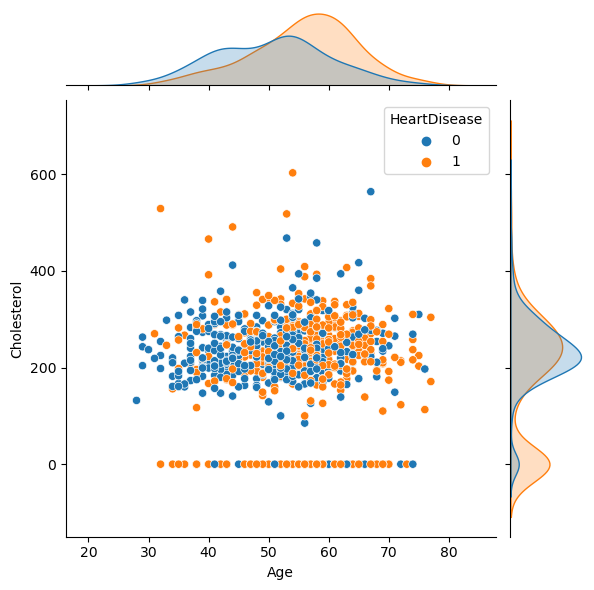

In [30]:
# jointplot for 'Age' vs 'Cholesterol'
plt.figure(figsize=(10,8))
sns.jointplot(data=df,x='Age',y='Cholesterol',hue='HeartDisease')

Plotting violinplot for the 'Heart Disease' (target feature) vs 'All numeric features'. It used to visualize the distribution of numerical data.

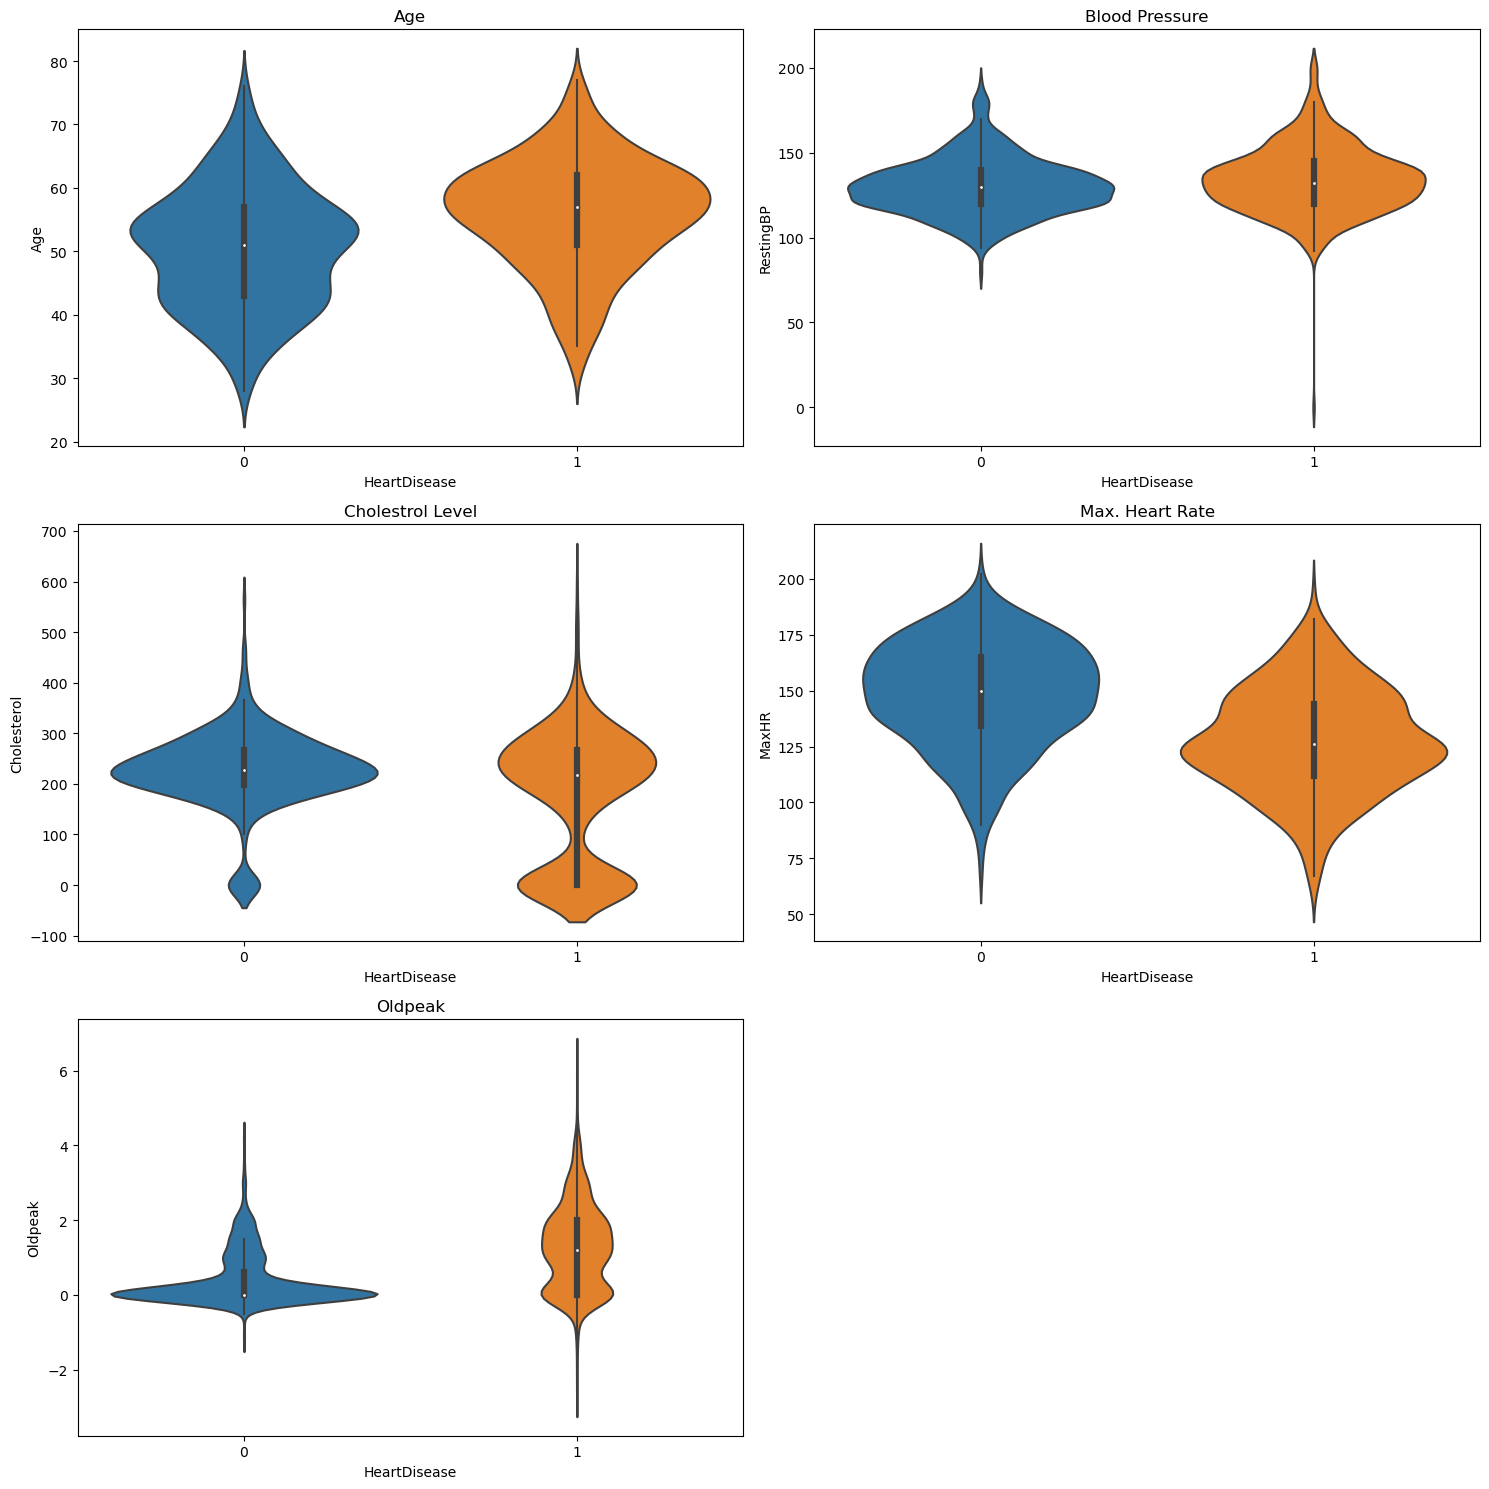

In [31]:
# making violinplots for features ('Heart Disease' vs 'All numeric features')
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.violinplot(x=df['HeartDisease'],y=df['Age'])
plt.title('Age')

plt.subplot(3,2,2)
sns.violinplot(x=df['HeartDisease'],y=df['RestingBP'])
plt.title('Blood Pressure')

plt.subplot(3,2,3)
sns.violinplot(x=df['HeartDisease'],y=df['Cholesterol'])
plt.title('Cholestrol Level')

plt.subplot(3,2,4)
sns.violinplot(x=df['HeartDisease'],y=df['MaxHR'])
plt.title('Max. Heart Rate')

plt.subplot(3,2,5)
sns.violinplot(x=df['HeartDisease'],y=df['Oldpeak'])
plt.title('Oldpeak')

plt.tight_layout()

Plotting violinplot for the 'Sex' vs 'All numeric features'. It used to visualize the distribution of numerical data.

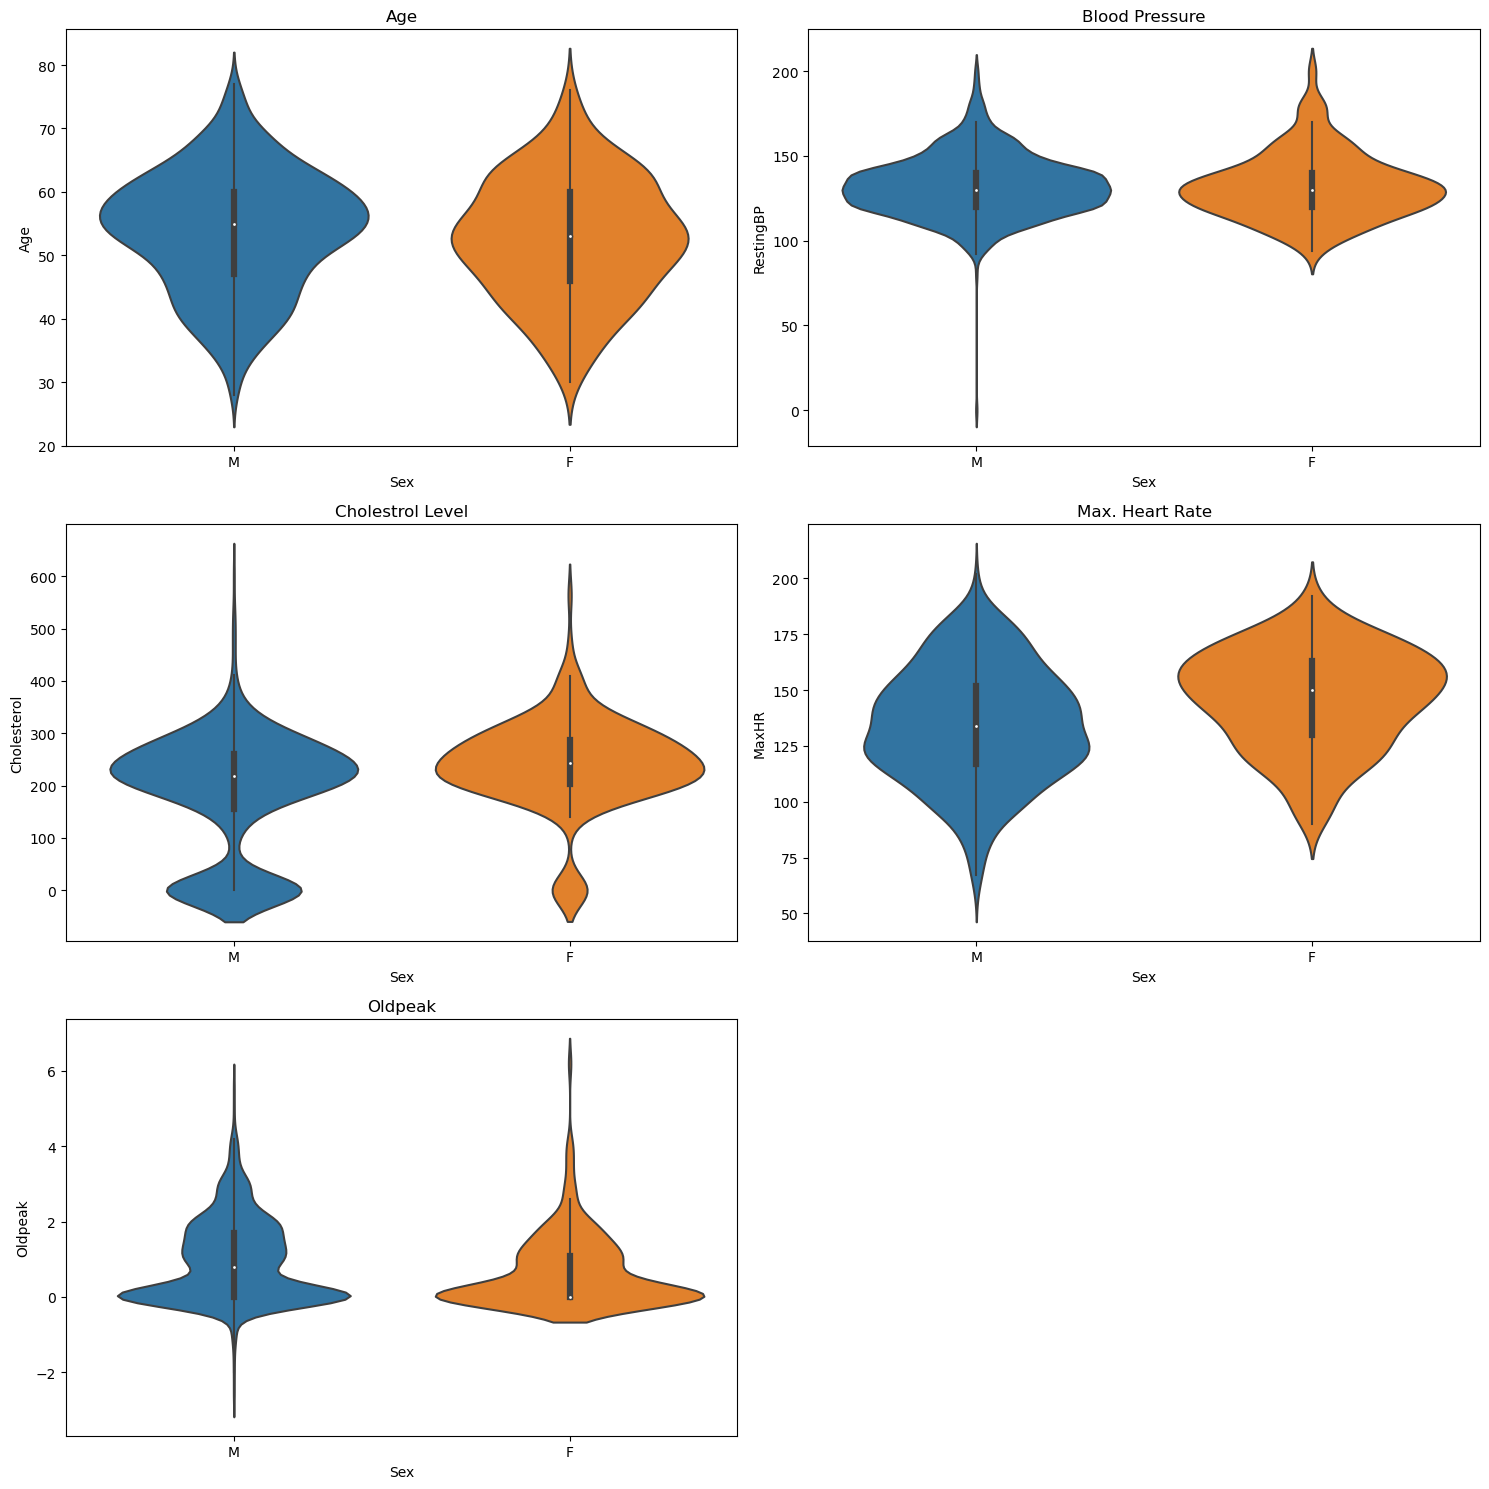

In [32]:
# making violinplots for features ('Sex' vs 'All numeric features')
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.violinplot(x=df['Sex'],y=df['Age'])
plt.title('Age')

plt.subplot(3,2,2)
sns.violinplot(x=df['Sex'],y=df['RestingBP'])
plt.title('Blood Pressure')

plt.subplot(3,2,3)
sns.violinplot(x=df['Sex'],y=df['Cholesterol'])
plt.title('Cholestrol Level')

plt.subplot(3,2,4)
sns.violinplot(x=df['Sex'],y=df['MaxHR'])
plt.title('Max. Heart Rate')

plt.subplot(3,2,5)
sns.violinplot(x=df['Sex'],y=df['Oldpeak'])
plt.title('Oldpeak')

plt.tight_layout()

Plotting heatmap to check the correlation of features in visual or colorful way.

<AxesSubplot:title={'center':'Heatmap for Dataframe (Without Encoding Object type features)'}>

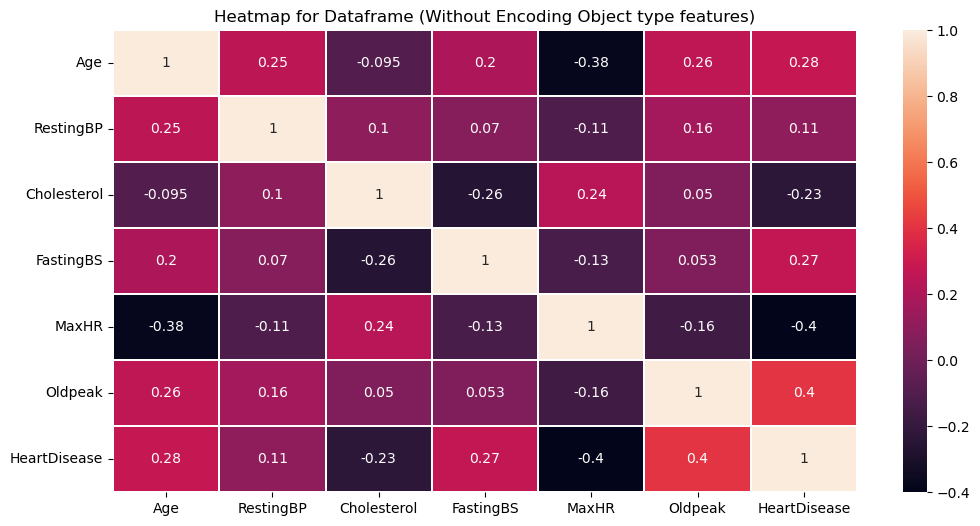

In [33]:
# Heatmap of complete numeric dataframe (before one-hot encoding)

#making an object variable for heatmap 
df_corr = df.corr()

# adjust the size
plt.figure(figsize=(12,6))

# setup a title
plt.title('Heatmap for Dataframe (Without Encoding Object type features)')

# plotting of heatmap
sns.heatmap(df_corr,annot=True,linecolor='white',linewidths=0.2)

### One Hot Encoding 

One Hot Encoding can be defined as a process of transforming categorical variables into numerical format before fitting and training a Machine Learning algorithm.

One-Hot Encoding of 'Sex', 'Chest Pain Type', 'Resting ECG', 'Exercise Angina' and 'ST Slope'.

In [34]:
# one-hot encoding for 'Sex' column
one_hot_encoded_sex = pd.get_dummies(df,columns=['Sex'],drop_first=True)

one_hot_encoded_sex.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,1
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,1
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,1


In [35]:
# one-hot encoding for 'Chest Pain Type' column
one_hot_encoded_cpt = pd.get_dummies(one_hot_encoded_sex,columns=['ChestPainType'],drop_first=True)

one_hot_encoded_cpt.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,Normal,172,N,0.0,Up,0,1,1,0,0
1,49,160,180,0,Normal,156,N,1.0,Flat,1,0,0,1,0
2,37,130,283,0,ST,98,N,0.0,Up,0,1,1,0,0
3,48,138,214,0,Normal,108,Y,1.5,Flat,1,0,0,0,0
4,54,150,195,0,Normal,122,N,0.0,Up,0,1,0,1,0


In [36]:
# one-hot encoding for 'RestingECG' column
one_hot_encoded_recg = pd.get_dummies(one_hot_encoded_cpt,columns=['RestingECG'],drop_first=True)

one_hot_encoded_recg.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST
0,40,140,289,0,172,N,0.0,Up,0,1,1,0,0,1,0
1,49,160,180,0,156,N,1.0,Flat,1,0,0,1,0,1,0
2,37,130,283,0,98,N,0.0,Up,0,1,1,0,0,0,1
3,48,138,214,0,108,Y,1.5,Flat,1,0,0,0,0,1,0
4,54,150,195,0,122,N,0.0,Up,0,1,0,1,0,1,0


In [37]:
# one-hot encoding for 'ExerciseAngina' column
one_hot_encoded_exa = pd.get_dummies(one_hot_encoded_recg,columns=['ExerciseAngina'],drop_first=True)

one_hot_encoded_exa.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y
0,40,140,289,0,172,0.0,Up,0,1,1,0,0,1,0,0
1,49,160,180,0,156,1.0,Flat,1,0,0,1,0,1,0,0
2,37,130,283,0,98,0.0,Up,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1.5,Flat,1,0,0,0,0,1,0,1
4,54,150,195,0,122,0.0,Up,0,1,0,1,0,1,0,0


In [38]:
# one-hot encoding for 'ST_Slope' column
final_df = pd.get_dummies(one_hot_encoded_exa,columns=['ST_Slope'],drop_first=True)

final_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


### Data Preprocessing 

In [39]:
# rename columns in final dataframe
final_df.rename(columns={'Sex_M':'Sex', 'ExerciseAngina_Y':'ExerciseAngina'},inplace=True)

# renamed columns in final dataframe
final_df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [40]:
# information of final dataframe
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex                918 non-null    uint8  
 8   ChestPainType_ATA  918 non-null    uint8  
 9   ChestPainType_NAP  918 non-null    uint8  
 10  ChestPainType_TA   918 non-null    uint8  
 11  RestingECG_Normal  918 non-null    uint8  
 12  RestingECG_ST      918 non-null    uint8  
 13  ExerciseAngina     918 non-null    uint8  
 14  ST_Slope_Flat      918 non-null    uint8  
 15  ST_Slope_Up        918 non-null    uint8  
dtypes: float64(1), int64(6), u

As we see, number of features is increased dur to one-hot encoding.

<AxesSubplot:title={'center':'Heatmap for Final Dataframe (After Encoding Object type features)'}>

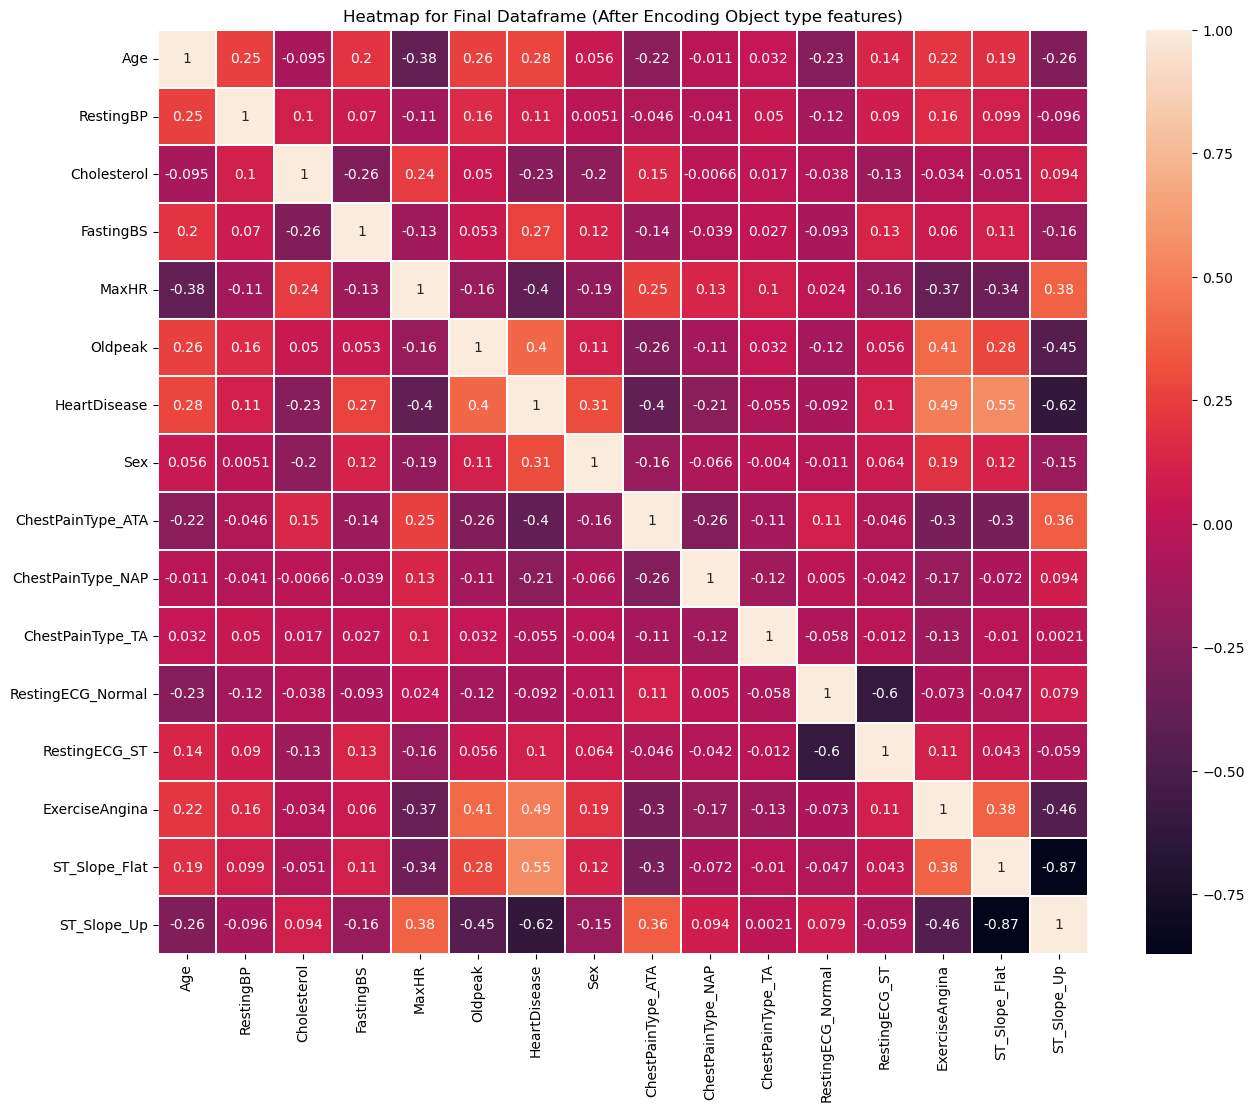

In [41]:
# Heatmap of complete numeric dataframe (after one-hot encoding)

#making an object variable for heatmap 
final_df_corr = final_df.corr()

# adjust the size
plt.figure(figsize=(15,12))

# setup a title
plt.title('Heatmap for Final Dataframe (After Encoding Object type features)')

# plotting of heatmap
sns.heatmap(final_df_corr,annot=True,linecolor='white',linewidths=0.2)

## Machine Learning 

### Import ML Libraries 

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,log_loss
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
import shap

### Train Test and Split Data 

In [43]:
# spliting data into X and y variables

# data or dependent variable
X = final_df.drop('HeartDisease',axis=1)

# target or independent variable
y = final_df['HeartDisease']

In [44]:
# spliting data into train and test variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
# check the shapes of all variables which we create above
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((642, 15), (276, 15), (642,), (276,))

In [46]:
# scaling or normalize train and test data
scaler = MinMaxScaler()

# X train data
X_train = scaler.fit_transform(X_train)

# X test data
X_test = scaler.transform(X_test)

### Finding Best Three Algorithms for Problem 

In [47]:
# create object for all algorithms
lr = LogisticRegression()
dtree = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=200)
svm = SVC(probability=True)
knn = KNeighborsClassifier(n_neighbors=5)
nb = CategoricalNB(force_alpha=True)

Check the accuracy and log loss for all algorithms after train and test the data

In [48]:
# making a list of all algorithms object
algos = [lr,dtree,rfc,svm,knn,nb]
ml_algo = ['Logistic Regs','Decision Tree','Random Forest','SVM','KNNeighbors','Naive Bayes']

# making a for loop to work on all algorithms
for i,j in zip(algos,ml_algo):
    i.fit(X_train,y_train)
    pred = i.predict(X_test)
    print(j,':\n')
    print('Accuracy Score:{:.2f}%'.format(accuracy_score(y_test,pred)*100))
    print('Log Loss:{:.2f}'.format(log_loss(y_test,pred)))
    print('='*40)

Logistic Regs :

Accuracy Score:87.68%
Log Loss:4.44
Decision Tree :

Accuracy Score:77.54%
Log Loss:8.10
Random Forest :

Accuracy Score:88.77%
Log Loss:4.05
SVM :

Accuracy Score:85.87%
Log Loss:5.09
KNNeighbors :

Accuracy Score:85.51%
Log Loss:5.22
Naive Bayes :

Accuracy Score:82.97%
Log Loss:6.14


As we can see, all our algorithms works great expect Decision Tree (accuracy:77.54% and log loss:8.10). So, it's time to select top three algorithm to continue further and building our model. Let's see the algorithms with their accuracy and log loss:

      Algorithms           |     Accuracy    |      Log Loss
      ---------------------|-----------------|--------------
      1. Logistic Regs.    |     87.68%      |      4.44
      2. Random Forest     |     88.77%      |      4.05
      3. SVM               |     85.87%      |      5.09

### Important Terms 

1. Confusion Matrix: A confusion matrix is a table used in machine learning and statistics to assess the performance of a classification model. It summarizes the results of classification by showing the counts of true positive, true negative, false positive, and false negative predictions.

2. Classification Report: This is the summary of the quality of classification made by the constructed ML model. It comprises mainly 5 columns and (N+3) rows. The first column is the class label’s name and followed by Precision, Recall, F1-score, and Support. N rows are for N class labels and other three rows are for accuracy, macro average, and weighted average. 

3. Shap Values: SHAP values are a common way of getting a consistent and objective explanation of how each feature impacts the model's prediction. SHAP values are based on game theory and assign an importance value to each feature in a model.

4. ROC Curve: An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate.

5. ROC AUC Score: The ROC AUC score tells us how efficient the model is. The higher the AUC, the better the model's performance at distinguishing between the positive and negative classes. An AUC score of 1 means the classifier can perfectly distinguish between all the Positive and the Negative class points.

### Logistic Regression 

In [49]:
# fitting the training data
lr.fit(X_train,y_train)

# prediction on test data
lr_pred = lr.predict(X_test)

# check the classification report of logistic regression model
print('Classification Report of Logistic Regression:\n')
print(classification_report(y_test,lr_pred))

Classification Report of Logistic Regression:

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       112
           1       0.92      0.87      0.89       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

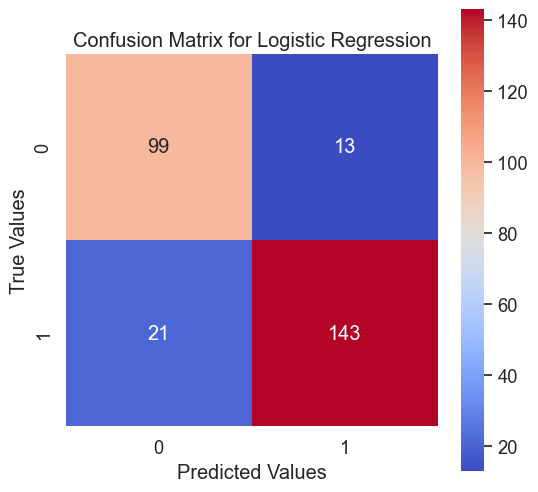

In [50]:
# create an instance of the confusion matrix
lr_cm = confusion_matrix(y_test,lr_pred)

# adjust the size of the confusion matrix
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)
# create a heatmap which show the confusion matrix of Logistic Reg. model
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='coolwarm', square=True,xticklabels=['0', '1'],yticklabels=['0', '1'])

plt.xlabel('Predicted Values') # x label of the confusion matrix
plt.ylabel('True Values') # y label of the confusion matrix
plt.title('Confusion Matrix for Logistic Regression') # title of the confusion matrix

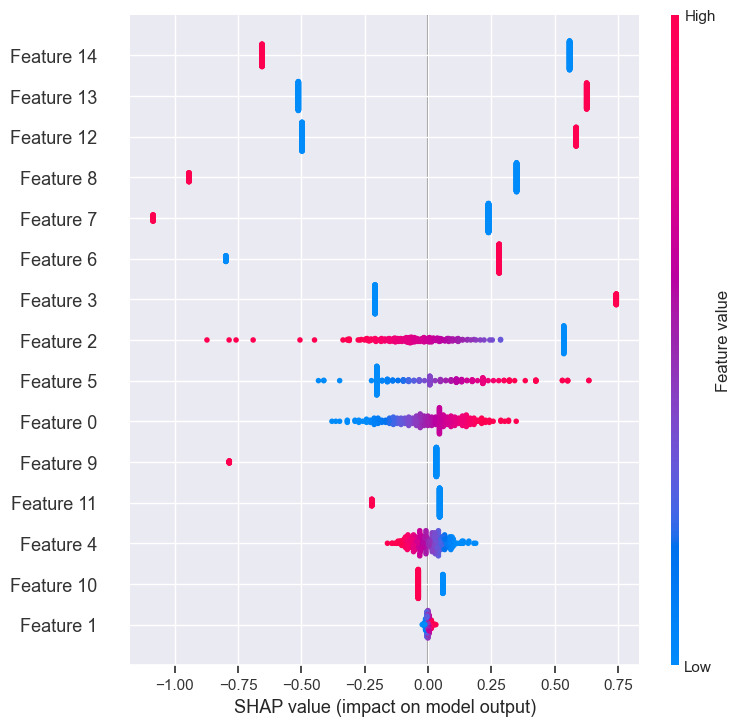

In [51]:
# shap is used to check the most important or importance of features for the logistic reg. model
plt.figure(figsize=(12,8))
masker = shap.maskers.Independent(data = X_train)
explainer_of_dtc = shap.LinearExplainer(lr,masker=masker)
shap_value = explainer_of_dtc.shap_values(X_test)
shap.summary_plot(shap_value,X_test)

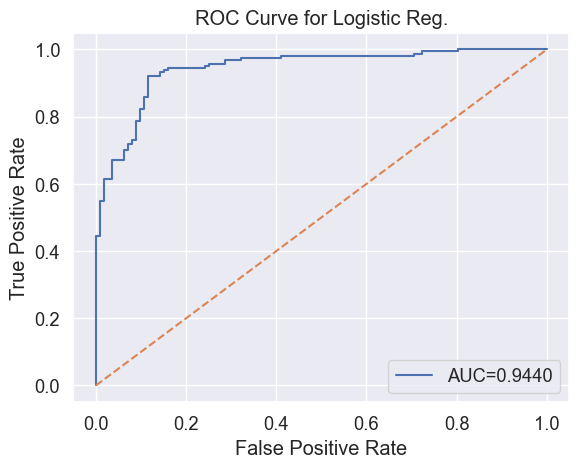

In [52]:
# create a ROC Curve and AUC plot to assess the overall diagnostic performance of a test and to compare the performance of
# two or more diagnostic tests.

lr_pred_prob = lr.predict_proba(X_test)[:][:,1]

lr_actual_predict = pd.concat([pd.DataFrame(np.array(y_test),columns=['y actual']),
                               pd.DataFrame(lr_pred_prob,columns=['y pred prob'])],axis=1)
lr_actual_predict.index = y_test.index

fpr, tpr, tr = roc_curve(lr_actual_predict['y actual'],lr_actual_predict['y pred prob'])
auc = roc_auc_score(lr_actual_predict['y actual'],lr_actual_predict['y pred prob'])

plt.plot(fpr,tpr, label='AUC=%.4f'%auc)
plt.plot(fpr,fpr,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Reg.')
plt.legend()

### Random Forest 

In [53]:
# fitting the training data
rfc.fit(X_train,y_train)

# prediction on test data
rfc_pred = rfc.predict(X_test)

# check the classification report of Random forest model
print('Classification Report of Random Forest:\n')
print(classification_report(y_test,rfc_pred))

Classification Report of Random Forest:

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       112
           1       0.90      0.89      0.89       164

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

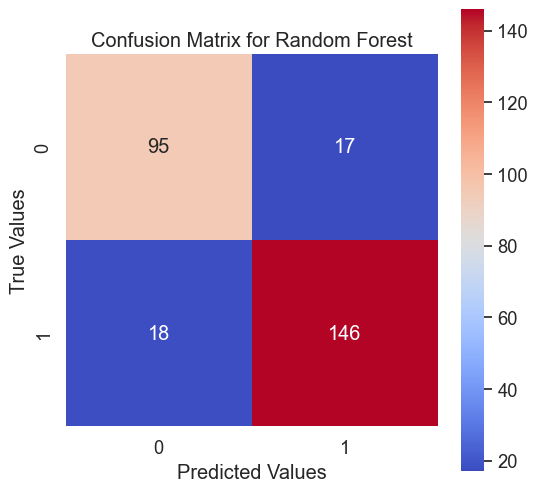

In [54]:
# create an instance for the random forest confusion matrix
rfc_cm = confusion_matrix(y_test,rfc_pred)

# adjust the size of the confusion matrix
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)

# create a heatmap which show the confusion matrix of the random forest model
sns.heatmap(rfc_cm, annot=True, fmt='d', cmap='coolwarm', square=True,xticklabels=['0', '1'],yticklabels=['0', '1'])

plt.xlabel('Predicted Values') # x label of the confusion matrix
plt.ylabel('True Values') # y label of the confusion matrix
plt.title('Confusion Matrix for Random Forest') # title of the confusion matrix

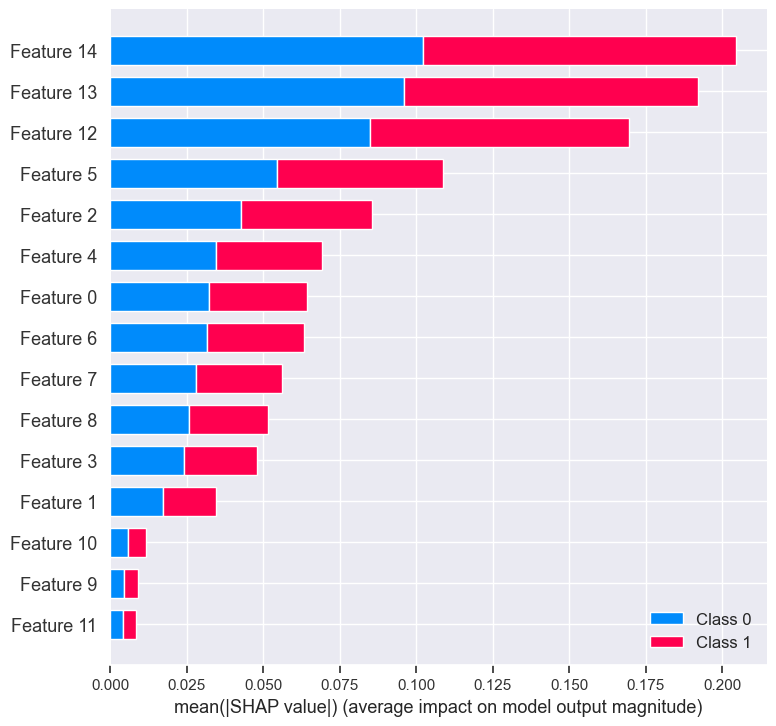

In [55]:
# shap plot for the random forest model
explainer_of_rfc = shap.TreeExplainer(rfc)
shap_value = explainer_of_rfc.shap_values(X_test)
shap.summary_plot(shap_value,X_test)

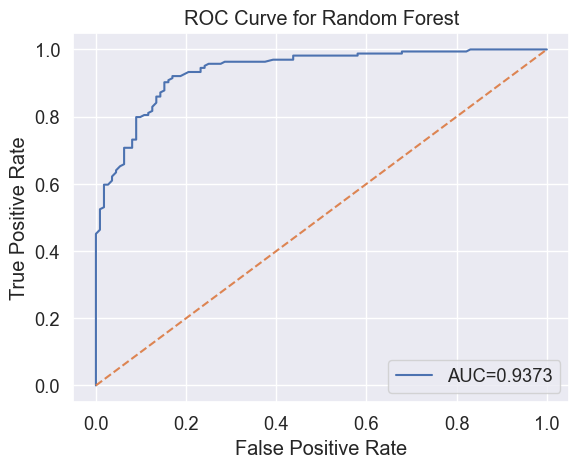

In [56]:
# ROC and AUC score for the random forest model
rfc_pred_prob = rfc.predict_proba(X_test)[:][:,1]

rfc_actual_predict = pd.concat([pd.DataFrame(np.array(y_test),columns=['y actual']),
                               pd.DataFrame(rfc_pred_prob,columns=['y pred prob'])],axis=1)
rfc_actual_predict.index = y_test.index

fpr, tpr, tr = roc_curve(rfc_actual_predict['y actual'],rfc_actual_predict['y pred prob'])
auc = roc_auc_score(rfc_actual_predict['y actual'],rfc_actual_predict['y pred prob'])

plt.plot(fpr,tpr, label='AUC=%.4f'%auc)
plt.plot(fpr,fpr,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()

### Support Vector Machine (SVM) 

In [57]:
# fitting the training data
svm.fit(X_train,y_train)

# prediction on test data
svm_pred = svm.predict(X_test)

# check the classification report of SVM model
print('Classification Report of SVM:\n')
print(classification_report(y_test,svm_pred))

Classification Report of SVM:

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       112
           1       0.89      0.87      0.88       164

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.85       276
weighted avg       0.86      0.86      0.86       276



Text(0.5, 1.0, 'Confusion Matrix for SVM')

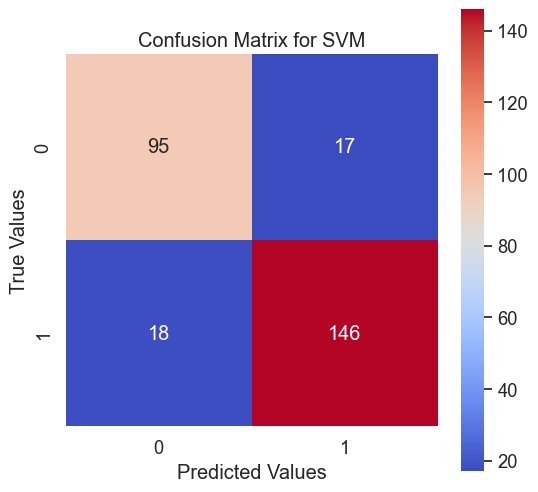

In [58]:
# create an instance for the SVM confusion matrix
svm_cm = confusion_matrix(y_test,rfc_pred)

# adjust the size of the confusion matrix 
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)

# create a heatmap which show the confusion matrix of the SVM model
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='coolwarm', square=True,xticklabels=['0', '1'],yticklabels=['0', '1'])

plt.xlabel('Predicted Values') # x label of the confusion matrix
plt.ylabel('True Values') # y label of the confusion matrix
plt.title('Confusion Matrix for SVM') # title of the confusion matrix

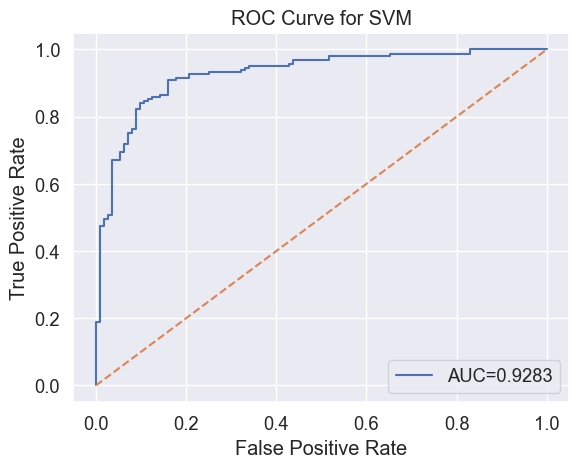

In [59]:
# ROC and AUC score for the SVM model
svm_pred_prob = svm.predict_proba(X_test)[:][:,1]

svm_actual_predict = pd.concat([pd.DataFrame(np.array(y_test),columns=['y actual']),
                               pd.DataFrame(svm_pred_prob,columns=['y pred prob'])],axis=1)
svm_actual_predict.index = y_test.index

fpr, tpr, tr = roc_curve(svm_actual_predict['y actual'],svm_actual_predict['y pred prob'])
auc = roc_auc_score(svm_actual_predict['y actual'],svm_actual_predict['y pred prob'])

plt.plot(fpr,tpr, label='AUC=%.4f'%auc)
plt.plot(fpr,fpr,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend()

### Comparison of Different Models Confusion Matrix 

In [60]:
# making a list of different model confusion matrix
cm_models = [lr_cm,rfc_cm,svm_cm]
cm_model = ['Logistic Regs.','Random Forest','SVM']
# making a for loop
for i,j in zip(cm_models,cm_model):
    print(j,'Confusion Matrix:\n')
    print(i)
    print('='*30)

Logistic Regs. Confusion Matrix:

[[ 99  13]
 [ 21 143]]
Random Forest Confusion Matrix:

[[ 95  17]
 [ 18 146]]
SVM Confusion Matrix:

[[ 95  17]
 [ 18 146]]


## Conclusion

Hence, as we see all our three models, among all of those 'Random Forest' model performing well, because of evaluations like:- accuracy: 88.77%, log_loss:4.05, classification report, confusion matrix and roc_curve/roc_auc_score. But, In classification report all of these models are predicting correct values/class for 1(presence of heart disease, which is around 85%) as compare to 0(absence of heart disease, which is around 90%). But, well it depends on dataset and we can apply some of other techniques to increase the model accuracy like:- PCA (bcz we have 15 features, which might be large to train model, we have reduce the dimensions using it), Hyperparameter Tuning (extracting the best parameters of our models) and etc.

Now, all of our model performing well but, we need one model to make unseen or new data prediction. So, we are going to use 'Random Forest' due to evaluations I mentioned above.

## Saving Model 

In [64]:
import pickle

In [65]:
# use dump() function to save the model with pickle
save_rfc_model = pickle.dumps(rfc)

# use load() function to loading the saved model
rfc_from_pickle = pickle.loads(save_rfc_model)

# after loading, use test data to predict the outcome
rfc_from_pickle.predict(X_test)

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [66]:
final_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [67]:
rfc_from_pickle.predict([[30,158,220,0,160,1.3,1,0,0,1,1,0,0,0,0]])

array([0], dtype=int64)

In [68]:
with open('heart_disease_model.pkl', 'wb') as file:
    pickle.dump(rfc_from_pickle, file)